In [31]:
import time
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
from functools import wraps
from sklearn import linear_model
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest
from scipy.stats import probplot
from sklearn.preprocessing import power_transform
import seaborn as sns

In [21]:
# file_name = "train_combined_14_n_16.csv"
# file_name = "random_sampled.csv"
file_name = "Final.csv"
df = pd.read_csv(file_name)
list_of_column_names = list(df.columns)

In [22]:
df

,Unnamed: 0,Date,Id,Type,Family,Locale,Locale Name,State,Store Nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,Unit Sales,Transactions
0,784051,11/6/2014,34644254,B,GROCERY I,Regional,Santo Domingo de los Tsachilas,Los Rios,31,False,1022,10,False,0,77.87,14.0,1268
1,493024,5/24/2016,80164020,C,GROCERY I,National,Ecuador,Manabi,54,True,1034,3,True,0,48.04,2.0,816
2,421524,8/24/2016,88922696,B,GROCERY I,Local,Ambato,Pichincha,9,False,1056,6,False,0,46.29,2.0,1744
3,171897,4/1/2016,75014142,E,PLAYERS AND ELECTRONICS,Regional,Cotopaxi,Guayas,28,False,5446,10,False,0,35.36,2.0,1238
4,106636,4/18/2016,76613817,D,CLEANING,National,Ecuador,Pichincha,1,False,3038,13,False,0,39.74,5.0,2133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,592299,12/5/2016,98973041,C,CLEANING,Local,Quito,Pichincha,17,False,3032,12,False,0,51.72,2.0,1518
99996,645833,6/20/2014,25677077,B,CLEANING,National,Ecuador,Pichincha,18,False,3034,16,False,0,107.95,1.0,1290
99997,329344,5/3/2016,78149260,D,CLEANING,National,Ecuador,Manabi,53,False,3024,13,True,0,43.65,2.0,1505
99998,26631,12/1/2014,36394322,C,DAIRY,National,Ecuador,Pichincha,17,False,2116,12,False,1,68.98,1.0,1443


## Bar Graph

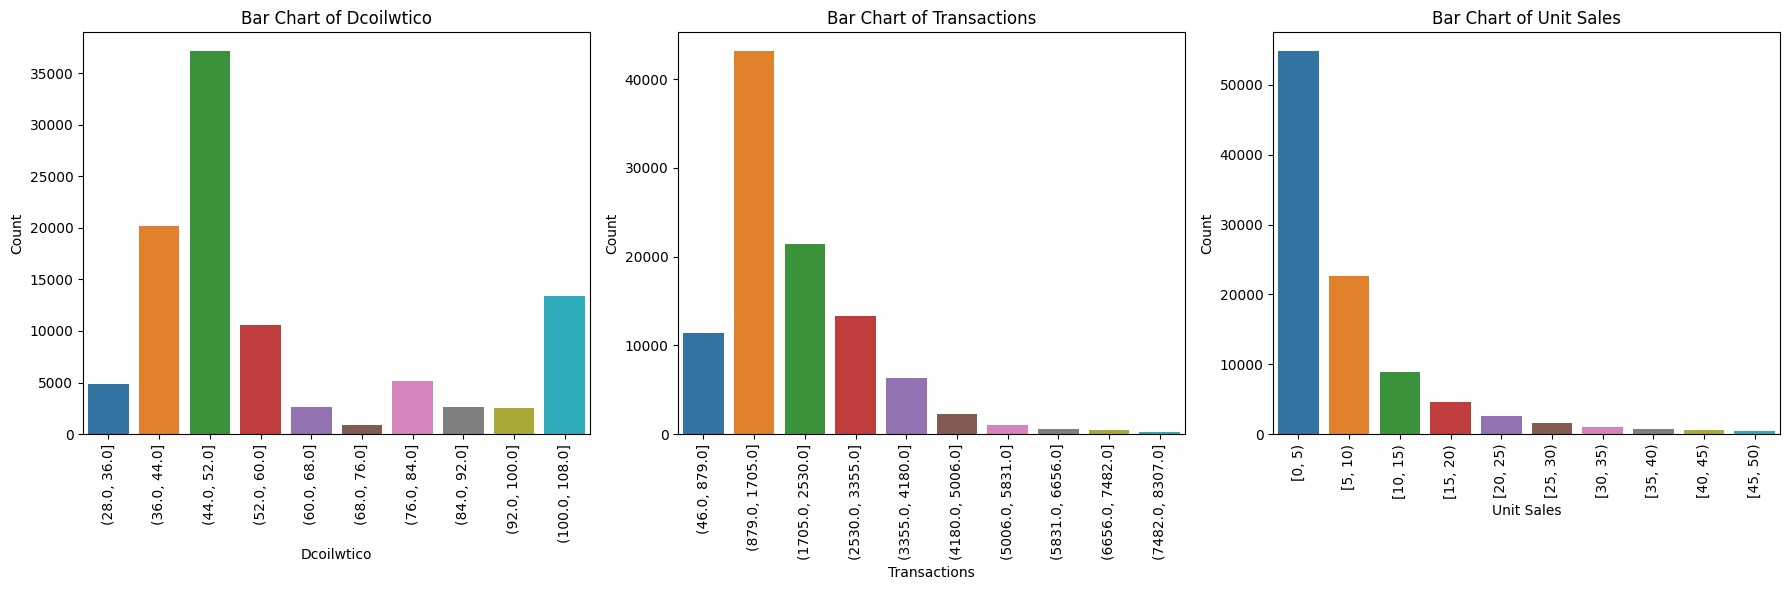

In [32]:
data = pd.read_csv('Final.csv')

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Define bin sizes for Dcoilwtico and Transactions
bin_sizes = {
   'Dcoilwtico': 10,
   'Transactions': 10
}

# Create bins for Dcoilwtico and Transactions
for col in ['Dcoilwtico', 'Transactions']:
   data[f"{col}_binned"] = pd.cut(data[col], bins=bin_sizes[col], precision=0)

# Adjust bin ranges for 'Unit Sales' to better focus on the common range of sales
bin_ranges = pd.interval_range(start=0, end=50, freq=5, closed='left')

# Re-bin the 'Unit Sales' with the new focused range
data['Unit Sales_binned'] = pd.cut(data['Unit Sales'], bins=bin_ranges)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs = axs.flatten()

# Plotting the binned data
for i, col in enumerate(['Dcoilwtico', 'Transactions', 'Unit Sales']):
   # Extract and set x-axis labels
   labels = [str(interval) for interval in data[f"{col}_binned"].cat.categories]
   sns.countplot(data=data, x=f"{col}_binned", ax=axs[i])
   axs[i].set_xticklabels(labels)
   axs[i].set_xlabel(col)  # Set x-axis label to just the column name
   axs[i].set_title(f'Bar Chart of {col}')
   axs[i].set_ylabel('Count')
   axs[i].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

## Time Series Plot

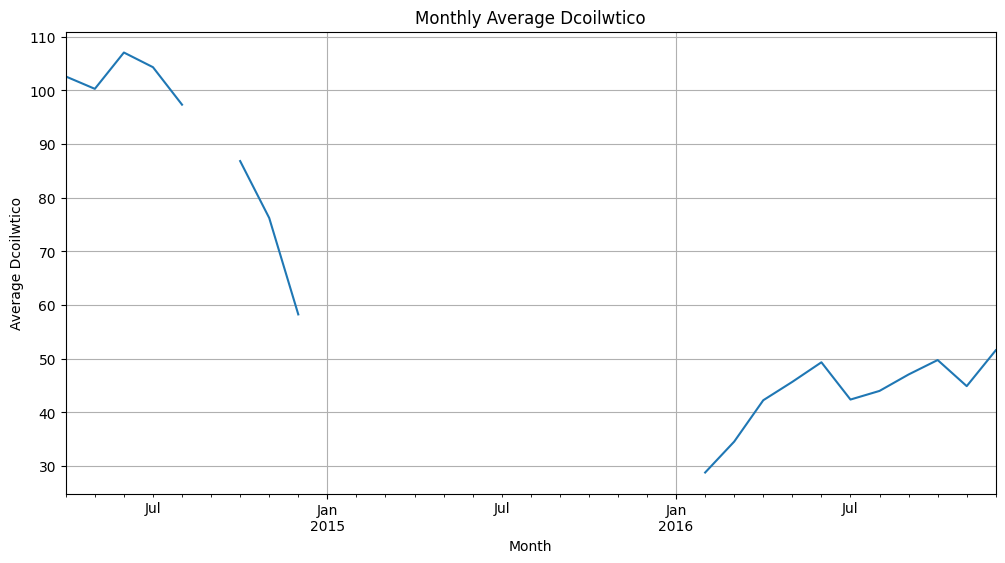

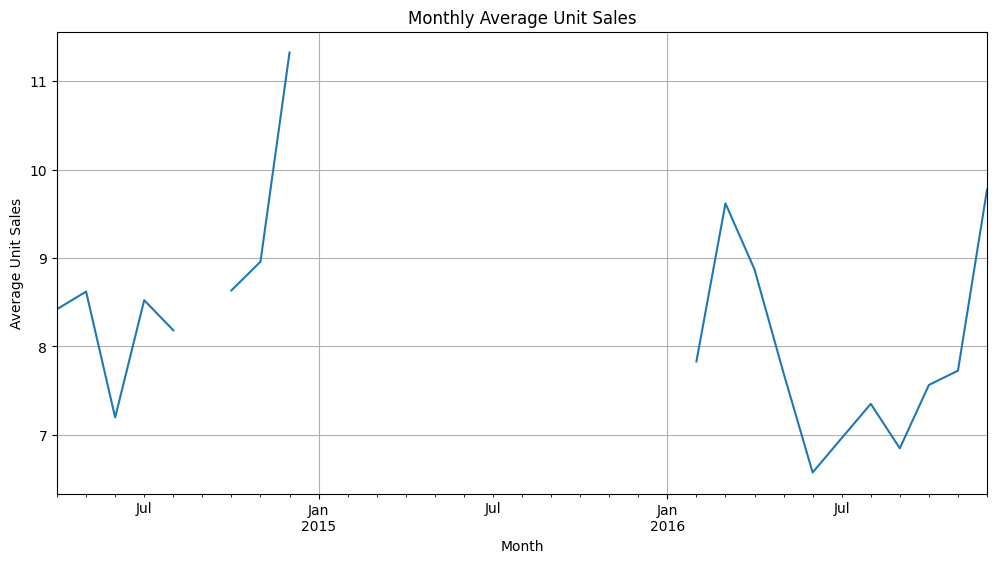

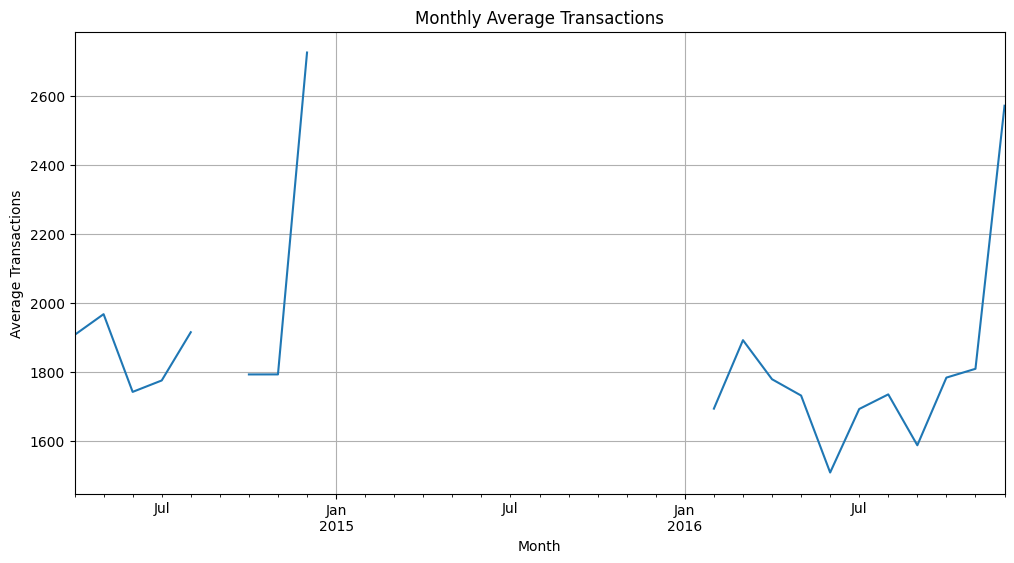

In [23]:

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

unit_sale = df['Unit Sales'].resample('M').mean()
dcoil = df['Dcoilwtico'].resample('M').mean()
transactions = df['Transactions'].resample('M').mean()

plt.figure(figsize=(12, 6))
dcoil.plot(title='Monthly Average Dcoilwtico')
plt.xlabel('Month')
plt.ylabel('Average Dcoilwtico')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
unit_sale.plot(title='Monthly Average Unit Sales')
plt.xlabel('Month')
plt.ylabel('Average Unit Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
transactions.plot(title='Monthly Average Transactions')
plt.xlabel('Month')
plt.ylabel('Average Transactions')
plt.grid(True)
plt.show()


## Q-Q Plot

Original data for Transactions column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000

Yeo-Johnson transformed data for Transactions column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000


/Users/harshshah/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


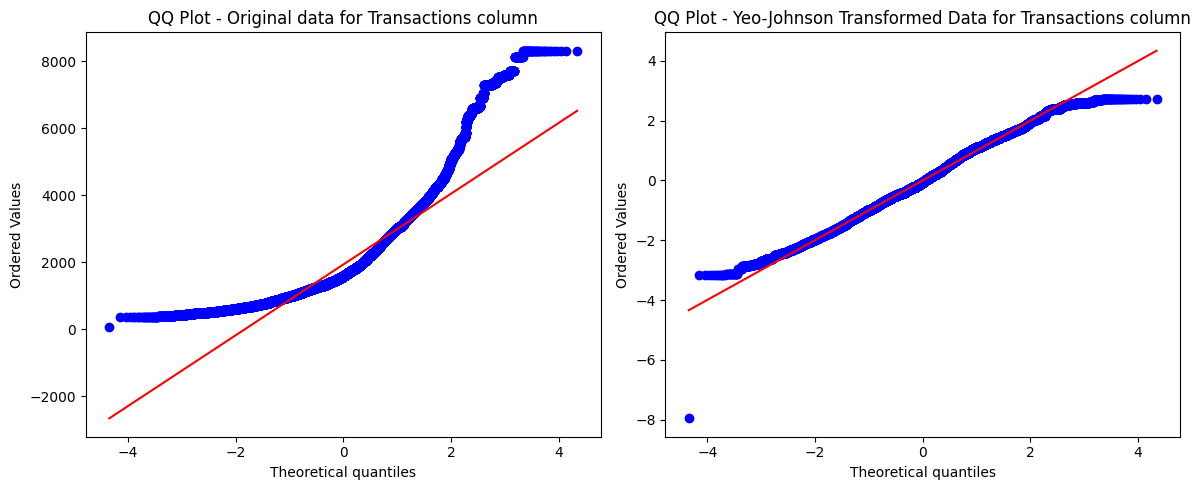

In [24]:
original_data = df['Transactions']


yj_transformed = power_transform(original_data.values.reshape(-1, 1), method='yeo-johnson')
yj_transformed = pd.Series(yj_transformed.flatten())

print('Original data for Transactions column:')
_, p_value_original = shapiro(original_data)
print(f'Shapiro-Wilk p-value: {p_value_original:.4f}')

_, p_value_ks_original = kstest(original_data, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_original:.4f}')

print('\nYeo-Johnson transformed data for Transactions column:')
_, p_value_yj = shapiro(yj_transformed)
print(f'Shapiro-Wilk p-value: {p_value_yj:.4f}')

_, p_value_ks_yj = kstest(yj_transformed, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_yj:.4f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

probplot(original_data, plot=ax1)
ax1.set_title('QQ Plot - Original data for Transactions column')

probplot(yj_transformed, plot=ax2)
ax2.set_title('QQ Plot - Yeo-Johnson Transformed Data for Transactions column')

plt.tight_layout()
plt.show()

Original data for Dcoilwtico column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000

Yeo-Johnson transformed data for Dcoilwtico column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000


/Users/harshshah/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


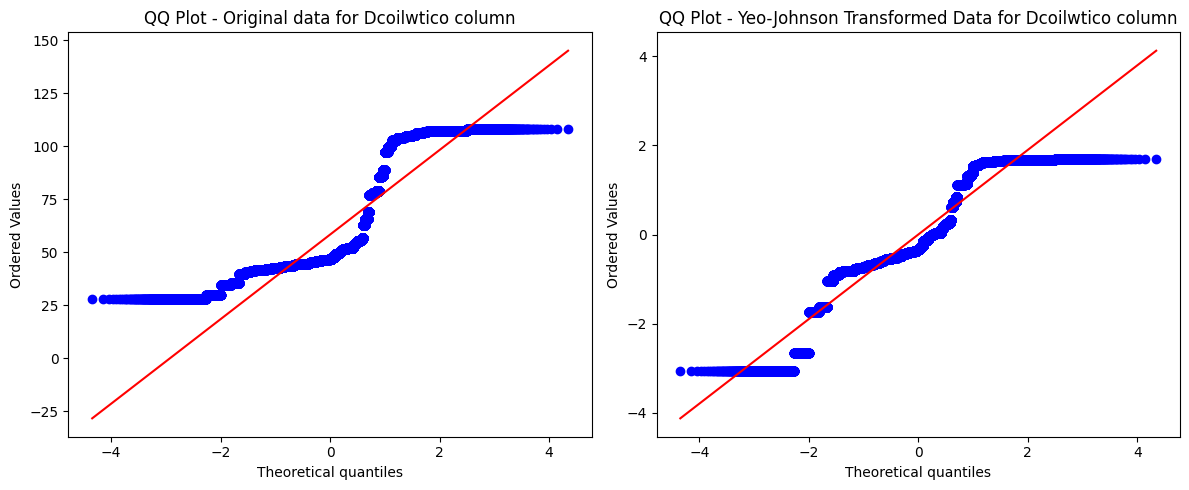

In [25]:
original_data = df['Dcoilwtico']


yj_transformed = power_transform(original_data.values.reshape(-1, 1), method='yeo-johnson')
yj_transformed = pd.Series(yj_transformed.flatten())

print('Original data for Dcoilwtico column:')
_, p_value_original = shapiro(original_data)
print(f'Shapiro-Wilk p-value: {p_value_original:.4f}')

_, p_value_ks_original = kstest(original_data, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_original:.4f}')

print('\nYeo-Johnson transformed data for Dcoilwtico column:')
_, p_value_yj = shapiro(yj_transformed)
print(f'Shapiro-Wilk p-value: {p_value_yj:.4f}')

_, p_value_ks_yj = kstest(yj_transformed, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_yj:.4f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

probplot(original_data, plot=ax1)
ax1.set_title('QQ Plot - Original data for Dcoilwtico column')

probplot(yj_transformed, plot=ax2)
ax2.set_title('QQ Plot - Yeo-Johnson Transformed Data for Dcoilwtico column')

plt.tight_layout()
plt.show()

Original data for Unit Sales column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000

Yeo-Johnson transformed data for Unit Sales column:
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000


/Users/harshshah/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


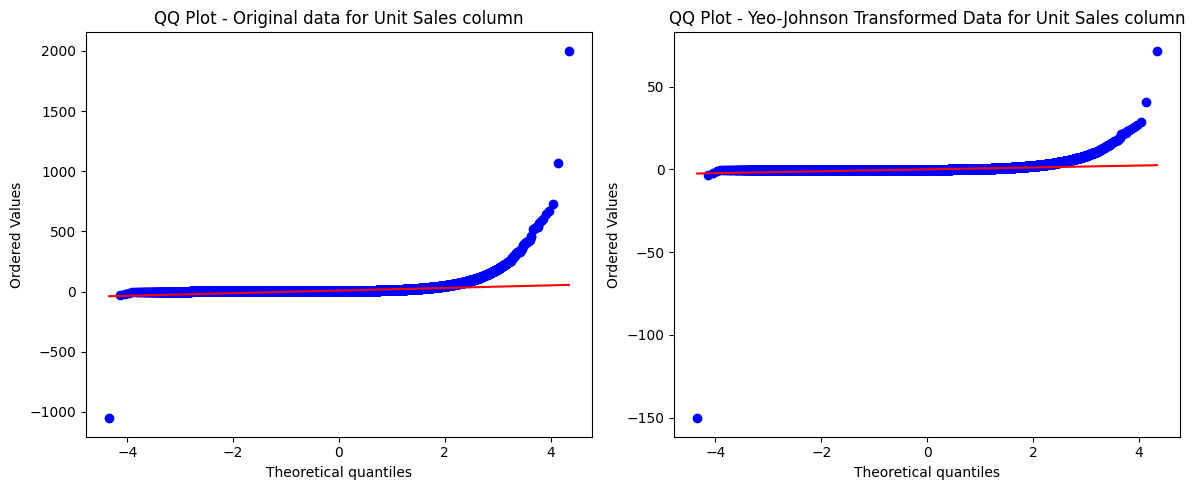

In [26]:
original_data = df['Unit Sales']


yj_transformed = power_transform(original_data.values.reshape(-1, 1), method='yeo-johnson')
yj_transformed = pd.Series(yj_transformed.flatten())

print('Original data for Unit Sales column:')
_, p_value_original = shapiro(original_data)
print(f'Shapiro-Wilk p-value: {p_value_original:.4f}')

_, p_value_ks_original = kstest(original_data, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_original:.4f}')

print('\nYeo-Johnson transformed data for Unit Sales column:')
_, p_value_yj = shapiro(yj_transformed)
print(f'Shapiro-Wilk p-value: {p_value_yj:.4f}')

_, p_value_ks_yj = kstest(yj_transformed, 'norm')
print(f'Kolmogorov-Smirnov p-value: {p_value_ks_yj:.4f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

probplot(original_data, plot=ax1)
ax1.set_title('QQ Plot - Original data for Unit Sales column')

probplot(yj_transformed, plot=ax2)
ax2.set_title('QQ Plot - Yeo-Johnson Transformed Data for Unit Sales column')

plt.tight_layout()
plt.show()

## CI for CLT

In [18]:
from scipy.stats import norm

transactions = df['Transactions']
df = pd.DataFrame(transactions.sample(n=1000, replace=True))

mu_x = df['Transactions'].mean()
std_x = df['Transactions'].std()

sample_size_100 = 100
sample_100 = df['Transactions'].sample(n=sample_size_100, replace=True)

# Calculating the sample mean and standard deviation
mean_100 = sample_100.mean()
std_100 = sample_100.std()

# Calculating the margin of error for 95% confidence
z_score = norm.ppf(0.975)  # For a two-tailed test
margin_of_error_100 = z_score * (std_100 / np.sqrt(sample_size_100))

# Constructing the confidence interval
conf_interval_100 = (mean_100 - margin_of_error_100, mean_100 + margin_of_error_100)

print(f"95% Confidence Interval for Transaction sample size 100: {conf_interval_100}")
print(f"Sample population mean for Transaction sample size 100: {mean_100}")
print(f"True population mean for Transaction sample size 100: {mu_x}")
print(f"Sample Standard Deviation for Transaction sample size 100: {std_100}")
print(f"True Standard Deviation for Transaction sample size 100: {std_x}")


95% Confidence Interval for Transaction sample size 100: (1529.2739435183519, 1872.746056481648)
Sample population mean for Transaction sample size 100: 1701.01
True population mean for Transaction sample size 100: 1903.549
Sample Standard Deviation for Transaction sample size 100: 876.2204705610928
True Standard Deviation for Transaction sample size 100: 1058.587175629578


In [19]:
sample_size_20 = 20
sample_20 = df['Transactions'].sample(n=sample_size_20, replace=True)

mean_20 = sample_20.mean()
std_20 = sample_20.std()

margin_of_error_20 = z_score * (std_20 / np.sqrt(sample_size_20))

conf_interval_20 = (mean_20 - margin_of_error_20, mean_20 + margin_of_error_20)

print(f"95% Confidence Interval for Transaction sample size 20: {conf_interval_20}")
print(f"Sample population mean for Transaction sample size 20: {mean_20}")
print(f"True population mean for Transaction sample size 100: {mu_x}")
print(f"Standard Deviation for Transaction sample size 20: {std_20}")
print(f"True Standard Deviation for Transaction sample size 100: {std_x}")

95% Confidence Interval for Transaction sample size 20: (1069.138077909557, 2381.961922090443)
Sample population mean for Transaction sample size 20: 1725.55
True population mean for Transaction sample size 100: 1903.549
Standard Deviation for Transaction sample size 20: 1497.7639289427773
True Standard Deviation for Transaction sample size 100: 1058.587175629578


## Hypothesis Testing

In [29]:
from scipy.stats import ttest_1samp, chi2
import numpy as np

samples_100 = [np.random.choice(df['Transactions'], size=100, replace=True) for _ in range(10)]

samples_20 = [np.random.choice(df['Transactions'], size=20, replace=True) for _ in range(50)]

sample_100 = samples_100[0]  
sample_20 = samples_20[0] 
# 1)
t_statistic, p_value = ttest_1samp(sample_100, 1900)
print(f"Test 1: Sample size 100: t-statistic = {t_statistic}, p-value = {p_value}")


# 2)
t_statistic, p_value = ttest_1samp(sample_20, 1900)
print(f"Test 2: Sample size 20: t-statistic = {t_statistic}, p-value = {p_value}")

# 3) 
sample_mean = np.mean(sample_20)
sample_std = np.std(sample_20, ddof=1)
n = len(sample_20)
chi_square_statistic = (n - 1) * sample_std**2 / 1100**2
p_value_two_tailed = chi2.sf(chi_square_statistic, n-1) * 2
print(f"Test 3: Chi-square statistic = {chi_square_statistic}, p-value = {p_value_two_tailed}")

# 4) 
p_value_one_tailed = chi2.sf(chi_square_statistic, n-1) 
print(f"Test 4: Chi-square statistic = {chi_square_statistic}, p-value = {p_value_one_tailed}")


Test 1: Sample size 100: t-statistic = 0.5566546216626699, p-value = 0.5790195976480433
Test 2: Sample size 20: t-statistic = 0.3257668960177601, p-value = 0.7481611868996239
Test 3: Chi-square statistic = 15.986706611570249, p-value = 1.3163295368537122
Test 4: Chi-square statistic = 15.986706611570249, p-value = 0.6581647684268561
